### 초기설정

In [3]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [4]:
import pandas as pd

df_2018 = pd.read_excel('/content/2018.xlsx')
df_2019 = pd.read_excel('/content/2019.xlsx')
df_2020 = pd.read_excel('/content/2020.xlsx')
df_2021 = pd.read_excel('/content/2021.xlsx')
df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [5]:
grade_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통이다': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [6]:
df_2018['국가명'] = df_2018['COUNTRY']

In [7]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2022~2024

In [8]:
# 1. 활동명 매핑
q4a_mapping_2022 = {
    "Q4A01": "식도락 관광", "Q4A02": "쇼핑", "Q4A03": "자연경관 감상", "Q4A04": "고궁/역사 유적지 방문",
    "Q4A05": "전통문화체험", "Q4A06": "박물관, 전시관 관람", "Q4A07": "K-POP/한류스타 공연장 방문",
    "Q4A08": "드라마/영화 촬영지 방문", "Q4A09": "연극, 뮤지컬, 발레 등 공연 관람", "Q4A10": "지역 축제 참여",
    "Q4A11": "유흥/오락", "Q4A12": "뷰티/의료관광", "Q4A13": "스포츠/레포츠 및 비즈니스 활동",
    "Q4A14": "업무수행", "Q4A15": "연수/교육/연구", "Q4A16": "시찰(산업시설 등)", "Q4A17": "기타"
}

q4b_code_mapping_2022 = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관, 전시관 관람", 7: "K-POP/한류스타 공연장 방문",
    8: "드라마/영화 촬영지 방문", 9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥/오락", 12: "뷰티/의료관광", 13: "스포츠/레포츠 및 비즈니스 활동",
    14: "업무수행", 15: "연수/교육/연구", 16: "시찰(산업시설 등)", 17: "기타"
}

q4a_cols = list(q4a_mapping_2022.keys())
q4b_cols = ["Q4B1", "Q4B2", "Q4B3"]

# 2. 주요활동 추출 함수
def get_q4a_activities(row):
    return [q4a_mapping_2022[col] for col in q4a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q4b_satisfaction(row):
    return [q4b_code_mapping_2022.get(int(row[col]), f"코드 {row[col]}")
            for col in q4b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2022가 정의된 상태에서만)
df_2022["주요활동"] = df_2022.apply(get_q4a_activities, axis=1)
df_2022["만족활동"] = df_2022.apply(get_q4b_satisfaction, axis=1)


In [9]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [10]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


# 1차 클러스터링

- 2022~2024년 회복기 기준으로 각 국가를 주력/신흥/잠재 시장으로 자동 분류

- 사용할 핵심 변수

  - 회복률_2022	: 2019년 대비 2022년 방문객 수 비율

  - 회복률_2023	: 2019년 대비 2023년 비율
  
  - 회복률_2024: 	2019년 대비 2024년 비율
  
  - 평균_만족도	(Q7 for 2022, Q11 for 2023/2024)
  
  - 평균_재방문의사	(Q8 for 2022, Q13 for 2023/2024)

+) 회복률_2022

  2019년 대비로 보는 이유?

  1) 관광산업 회복의 글로벌 표준 기준
  
    :UNWTO, 한국관광공사, 문화체육관광부 모두 2019년 대비를 기준으로 사용

  2)**팬데믹 이전 ‘정상적 수요 수준’**을 기준선으로 보기 때문
    
    → “회복률 100% 초과”면 팬데믹 이전보다 성장했다는 의미

  3)‘신흥시장’으로의 성장성 평가에도 적합:

    예: 싱가포르, 프랑스, 인도 등은 2019년보다 2배 이상 방문객 증가 → 이 지표로 신흥 여부 판단 가능

## 클러스터링할 데이터 프레임 생성

### 1.국가별 방문자 수 및 회복률 계산

In [9]:
# 연도별 방문자 수 계산 함수
def get_country_counts(df, year):
    return df['국가명'].value_counts().rename(f'visits_{year}')

# 방문자 수
visits_2019 = get_country_counts(df_2019, 2019)
visits_2022 = get_country_counts(df_2022, 2022)
visits_2023 = get_country_counts(df_2023, 2023)
visits_2024 = get_country_counts(df_2024, 2024)

# 통합
df_counts = pd.concat([visits_2019, visits_2022, visits_2023, visits_2024], axis=1).fillna(0)

# 회복률 계산 (2019년 대비)
df_counts['회복률_2022'] = df_counts['visits_2022'] / df_counts['visits_2019']
df_counts['회복률_2023'] = df_counts['visits_2023'] / df_counts['visits_2019']
df_counts['회복률_2024'] = df_counts['visits_2024'] / df_counts['visits_2019']

### 2. 만족도 & 재방문의사 평균 계산

In [10]:
# 국가별 평균값 계산 함수
def get_score_by_country(df, col):
    return df.groupby("국가명")[col].mean()

# 만족도 (Q7 in 2022, Q11 in 2023~2024)
satisfaction = pd.concat([
    get_score_by_country(df_2022, "Q7"),
    get_score_by_country(df_2023, "Q11"),
    get_score_by_country(df_2024, "Q11")
], axis=1).mean(axis=1).rename("평균_만족도")

# 재방문의사 (Q8 in 2022, Q13 in 2023~2024)
revisit = pd.concat([
    get_score_by_country(df_2022, "Q8"),
    get_score_by_country(df_2023, "Q13"),
    get_score_by_country(df_2024, "Q13")
], axis=1).mean(axis=1).rename("평균_재방문의사")

### 3. 최종 클러스터링용 DataFrame 생성


In [11]:
# 통합
df_cluster = pd.concat([df_counts, satisfaction, revisit], axis=1).dropna()

# 선택할 최종 변수 (KMeans에 투입할)
cluster_features = df_cluster[[
    "회복률_2022", "회복률_2023", "회복률_2024",
    "평균_만족도", "평균_재방문의사"
]]


## 클러스터링(K-means)

- 3개 시장 : 주력 / 신흥 / 잠재


### 1. 클러스터링

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 클러스터링 대상 피처 선택
cluster_features = df_cluster[[
    "회복률_2022", "회복률_2023", "회복률_2024",
    "평균_만족도", "평균_재방문의사"
]]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

# KMeans 클러스터링 (클러스터 수는 3개 추천: 주력 / 신흥 / 잠재)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

### 2. 시각화: 클러스터별 변수 분포

> 이 단계의 목적

  → 각 클러스터가 어떤 특성을 갖는지 지표별로 비교해보기 위함.

> 히트맵

  → 숫자값을 색상과 숫자로 동시에 보여주어 패턴 비교가 직관적.

  예: Cluster 1은 회복률 높고 만족도 낮은 국가들이구나



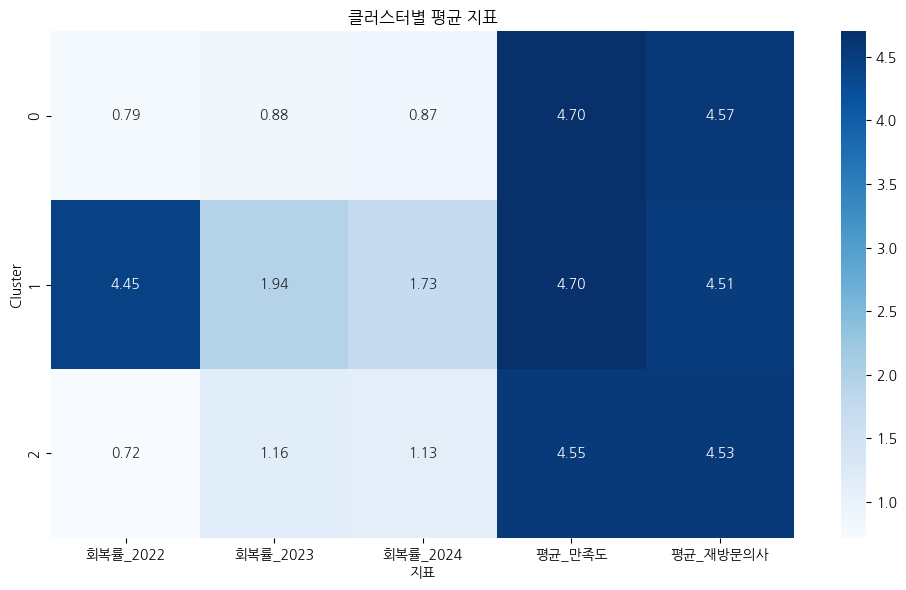

In [13]:
# 클러스터별 평균값 확인
cluster_summary = df_cluster.groupby("Cluster")[[
    "회복률_2022", "회복률_2023", "회복률_2024",
    "평균_만족도", "평균_재방문의사"
]].mean()

# 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="Blues", fmt=".2f")
plt.title("클러스터별 평균 지표")
plt.xlabel("지표")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

### 3. 시각화: 클러스터링 결과 (PCA 차원축소)

> 회복률, 만족도 등 5차원 데이터는 눈으로 보기 어려움으로 PCA 진행

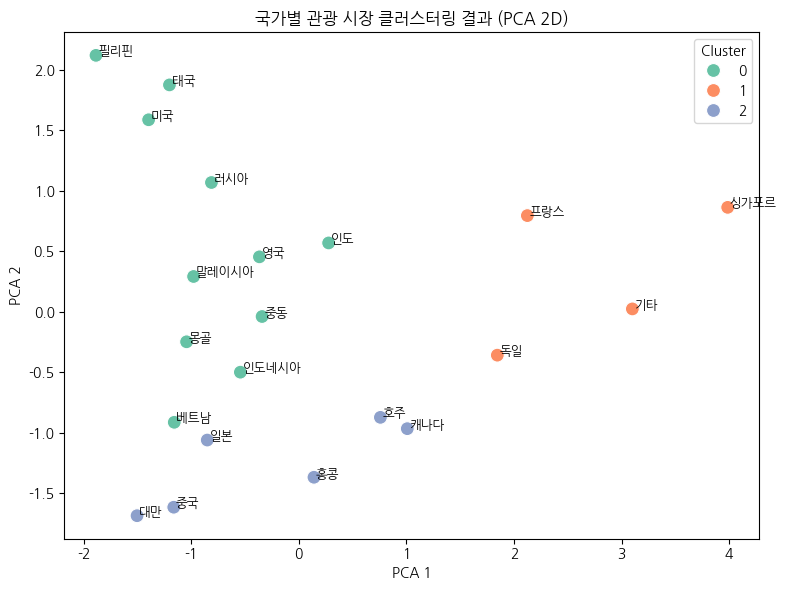

In [14]:
from sklearn.decomposition import PCA

# 2차원 축소
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_coords[:, 0], y=pca_coords[:, 1],
                hue=df_cluster['Cluster'],
                palette="Set2", s=100)

for i, country in enumerate(df_cluster.index):
    plt.text(pca_coords[i, 0]+0.02, pca_coords[i, 1], country, fontsize=9)

plt.title("국가별 관광 시장 클러스터링 결과 (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

>[1] 클러스터 결과

| 클러스터      | 회복률(2022\~24)              | 만족도             | 재방문의사       | 주요국가               | 특성 요약                           |
| --------- | -------------------------- | --------------- | ----------- | ------------------ | ------------------------------- |
| Cluster 0 | 낮음 (0.7\~0.88)             | 높음 (\~4.7)      | 높음 (\~4.57) | 미국, 태국, 필리핀, 베트남 등 | **재방문의사는 높지만 실제 방문은 저조**한 잠재시장  |
| Cluster 1 | 매우 높음 (4.45 → 1.94 → 1.73) | 높음 (\~4.7)      | 높음 (\~4.51) | 싱가포르, 프랑스, 독일 등    | **초고속 회복 + 고만족 시장**, 정책 우선 타겟   |
| Cluster 2 | 중간 (0.72\~1.16)            | 비교적 높음 (\~4.55) | 높음 (\~4.53) | 일본, 중국, 대만, 호주 등   | **정체 또는 안정적 주력시장**, 유지 or 개선 필요 |

>[2] 정책 시사점

    1) 초고속 회복군 (Cluster 1)

     - 특징: 회복률이 매우 높고, 재방문의사도 높은 고소득 장거리 시장

     - 전략: 집중 투자 및 고부가가치 상품 개발 (예: 럭셔리 관광, MICE)

    2) 정체군 (Cluster 2)

     - 특징: 만족도는 높지만 회복률은 1 내외로 정체

     - 전략: 기존 시장 유지 전략 + 일부 개선 시도

    3) 미국 포함 잠재시장군 (Cluster 0) ← 핵심

     - 특징: 재방문의사는 매우 높지만, 회복률이 낮고 정체됨

     - 전략:

      원인 분석 필요 (가격? 접근성? 인식 문제?)

      “재방문의사 → 실제 행동” 전환 유도 (디지털 캠페인 / 직항노선 / 할인 프로모션 연계)



## [2024기준] 국가별 관광객 순위

미국이 줄었는데도 불구하고 많은 편에 속한다면 타겟팅을 하는 이유가 타당할 수 있음

/tmp/ipython-input-11-1680514191.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visitor_counts_2024.head(20), x='국가명', y='방문자수', palette='viridis')


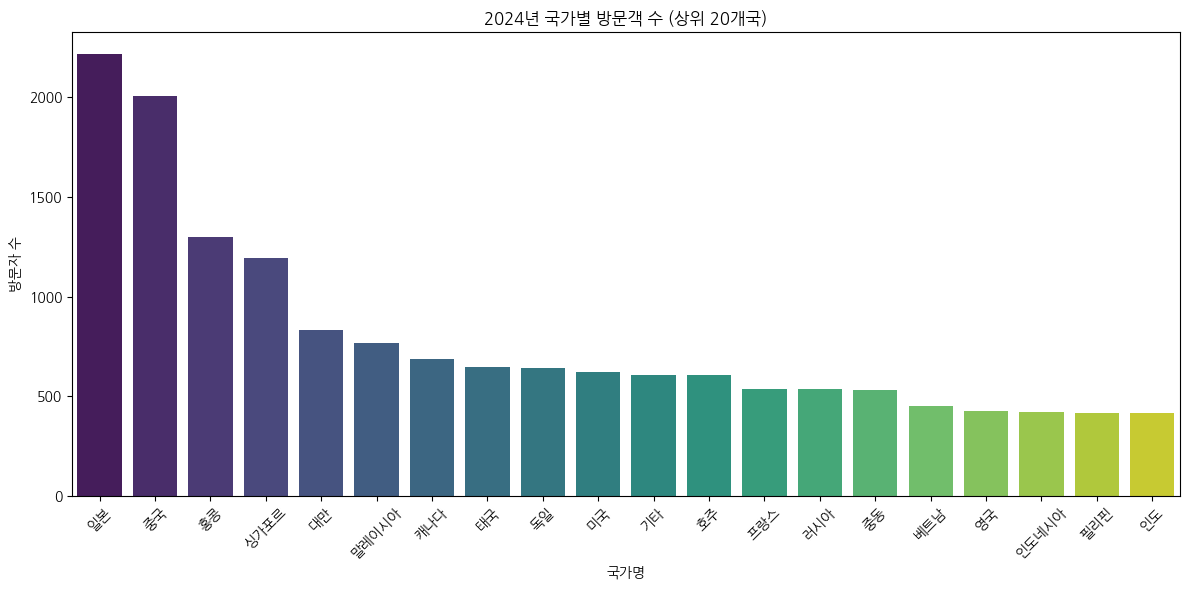

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 국가별 방문자 수 계산
visitor_counts_2024 = df_2024['국가명'].value_counts().reset_index()
visitor_counts_2024.columns = ['국가명', '방문자수']

# 2. 상위 20개국 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=visitor_counts_2024.head(20), x='국가명', y='방문자수', palette='viridis')
plt.title('2024년 국가별 방문객 수 (상위 20개국)')
plt.xticks(rotation=45)
plt.ylabel('방문자 수')
plt.xlabel('국가명')
plt.tight_layout()
plt.show()


방문객 수와 클러스터를 함께 고려한 전략

| 구분            | 클러스터      | 방문객 수 | 전략 제안                       |
| ------------- | --------- | ----- | --------------------------- |
| 싱가포르, 프랑스 등   | Cluster 1 | 상위권   | **강화 유지 / 고소득층 타겟 캠페인**   |
| 캐나다, 홍콩 등     | Cluster 2 | 상위권   | **잠재력 발굴 / 회복 유도형 전략**   |
| 미국, 태국, 필리핀 등 | Cluster 0 | 중상위권  | **리스크 요인 분석 / 맞춤 마케팅 필요** |

# 국가별 관광시장 분류 및 전략 제안 (2024 방문객 기준 + 행동지표 클러스터링 기반)

| 클러스터                         | 특성 요약                                       | 대표 국가                           | 전략 방향                                                                         |
| ---------------------------- | ------------------------------------------- | ------------------------------- | ----------------------------------------------------------------------------- |
| **Cluster 1**<br>(1순위 타겟 시장) | ✅ 회복률 높음<br>✅ 만족도/재방문 의사 높음<br>✅ 방문객 수 상위권  | **싱가포르, 프랑스, 독일, 기타국가**         | - 집중적 마케팅 및 맞춤형 상품 개발<br>- 고소득 장거리 시장 중심<br>- 한류, 프리미엄 상품 연계 가능성 탐색           |
| **Cluster 2**<br>(잠재 유지형 시장) | ❌ 회복률 낮음<br>✅ 만족도/재방문 의사 높음<br>✅ 방문객 수 많음   | **미국, 중국, 일본, 홍콩, 대만, 호주, 캐나다** | - **신뢰 회복형 정책 필요**<br>- 과거 충성고객 기반 유지 전략<br>- 불편 요인 제거(입국절차, 환율 등)와 감성 마케팅 병행 |
| **Cluster 0**<br>(선별 관리 대상)  | ❌ 회복률 낮음<br>❌ 방문객 수도 낮음<br>✅ 만족도/재방문 의사는 중간 | **베트남, 필리핀, 태국, 몽골, 러시아 등**     | - ROI 기반 **선별적 투자** 검토<br>- 정책 방향성과의 정합성 여부 검토<br>- 일부 지역 대상 파일럿 상품 시도 가능성    |


- Cluster 1은 **전략적으로 이상적**인 타겟: 회복도 빠르고 향후 재방문 의지도 높으며, 방문객 규모도 의미 있음.

- Cluster 2는 **실적은 크지만 회복세가 더딤**: 미국, 일본 등은 여전히 주요 타겟이지만, 체류 불만/심리 요인 분석 필요.

- Cluster 0은 보류 또는 실험적 접근: 신흥시장 중 일부는 기대 대비 실적이 낮아 선별적 시장 모니터링 및 실험 필요.

